In [3]:
%load_ext autoreload
%autoreload 2

In [26]:
from environment import Environment, DirectedTree
from prouter import Router
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def preparation_env():
    print(f"Preparing environment")
    env = Environment()
    print(f"Reading swmm-outfile")
    env.read_swmmoutfile(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.out")
    print(f"Preparing graph")
    graph = DirectedTree.from_swmm(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.inp")
    node_data = pd.read_csv(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp/pop_node_data.csv")
    node_data = node_data.set_index("NAME").to_dict(orient="index")
    graph.add_nodevalues(node_data)
    env.add_graph(graph)
    print(f"finished preparing environment\npreparing router")
    return env

In [38]:
environment = preparation_env()
router = Router()
router.add_environment(environment)
print(f"finished preparing router")
print(f"beginning router testing")
start = time.time()
routetable = router.route()
print(f"time for routing: {time.time()-start} seconds")
print(f"finished router testing")

Preparing environment
Reading swmm-outfile
Preparing graph
finished preparing environment
preparing router
finished preparing router
beginning router testing
time for routing: 3.5575387477874756 seconds
finished router testing


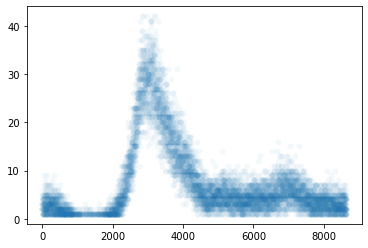

In [53]:
from collections import Counter
root_packets = routetable[router.environment.graph.root]
root_list = np.rint(list(root_packets.values()))%8640
c = Counter(root_list)
x = list(c.keys())
y = list(c.values())
plt.scatter(x,y, alpha=0.05, linewidth=0)

In [42]:
router.postprocess(routetable, 

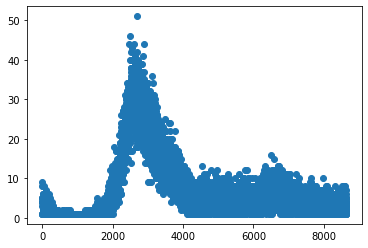

In [45]:
c = Counter(packets["t0"])
x = list(c.keys())
y = list(c.values())
plt.scatter(x,y)